In [1]:
#Model Tuning and Testing
import tensorflow as tf

data_dir = "C:/Users/Mr/Garbage_Classification_Project/dataset"
img_height, img_width = 128, 128
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 2527 files belonging to 6 classes.
Using 2022 files for training.
Found 2527 files belonging to 6 classes.
Using 505 files for validation.


In [2]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)

In [3]:
from tensorflow.keras.applications import EfficientNetV2B2
from tensorflow.keras import layers, models

base_model = EfficientNetV2B2(input_shape=(128, 128, 3),
                               include_top=False,
                               weights='imagenet')
base_model.trainable = False

model = models.Sequential([
    tf.keras.Input(shape=(128, 128, 3)),
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.2),
    layers.Dense(6, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetv2-b2 (Functional)  │ (None, 4, 4, 1408)     │     8,769,374 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1408)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 6)              │         8,454 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,777,828 (33.48 MB)

 Trainable params: 8,454 (33.02 KB)

 Non-trainable params: 8,769,374 (33.45 MB)

In [4]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)

Epoch 1/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 233s 2s/step - accuracy: 0.4807 - loss: 1.3442 - val_accuracy: 0.8119 - val_loss: 0.6584
Epoch 2/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.7998 - loss: 0.6519 - val_accuracy: 0.8396 - val_loss: 0.5322
Epoch 3/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.8264 - loss: 0.5299 - val_accuracy: 0.8396 - val_loss: 0.4869
Epoch 4/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.8572 - loss: 0.4465 - val_accuracy: 0.8495 - val_loss: 0.4571
Epoch 5/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.8632 - loss: 0.4207 - val_accuracy: 0.8475 - val_loss: 0.4372
Epoch 6/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.8775 - loss: 0.3884 - val_accuracy: 0.8515 - val_loss: 0.4255
Epoch 7/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 76s 1s/step - accuracy: 0.8880 - loss: 0.3572 - val_accuracy: 0.8495 - val_loss: 0.4138
Epoch 8/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - accuracy: 0.8947 - loss: 0.3355 - val_accuracy: 0.8495 - val_loss

In [5]:
val_loss, val_acc = model.evaluate(val_ds)
print(f"Validation Accuracy: {val_acc:.2f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 16s 964ms/step - accuracy: 0.8552 - loss: 0.3910
Validation Accuracy: 0.85


In [6]:
model.save("best_garbage_classifier_model.keras")
print("Model saved successfully as best_garbage_classifier_model.keras")

Model saved successfully as best_garbage_classifier_model.keras


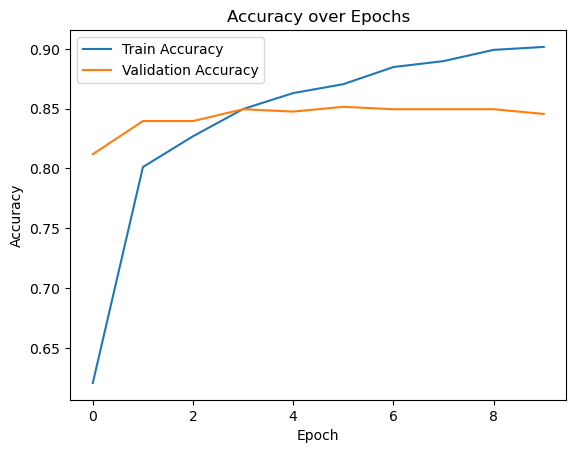

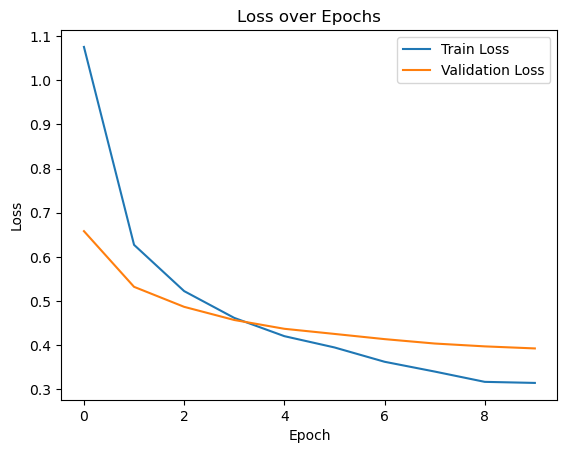

In [7]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [8]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 2527 files belonging to 6 classes.
Using 2022 files for training.


In [9]:
class_names = train_ds.class_names
train_ds = train_ds.prefetch(buffer_size=tf.data.AUTOTUNE)

In [10]:
import numpy as np
from sklearn.metrics import classification_report

y_true = []
y_pred = []

for images, labels in val_ds:
    preds = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

print(classification_report(y_true, y_pred, target_names=class_names))

1/1 ━━━━━━━━━━━━━━━━━━━━ 27s 27s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 979ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step    
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
1/1 ━━━━━━━━━━━━━━━━━━━━ 34s 34s/step
              precision    recall  f1-score   support

   cardboard       0.90      0.90      0.90        83
       glass       0.86      0.84      0.85       103
       metal       0.84      0.85      0.84        78
       paper       0.85      0.89      0.87       124
     plastic       0.86      0.78      0.82        88
       trash       0.62      0.69      0.66        29

    ac

In [11]:
import os
import csv
import numpy as np
from tensorflow.keras.preprocessing import image

custom_dir = "C:/Users/Mr/Garbage_Classification_Project/custom_test"
output_csv = "custom_predictions.csv"
class_names = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

with open(output_csv, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Image Name', 'Predicted Class'])

    for img_name in os.listdir(custom_dir):
        img_path = os.path.join(custom_dir, img_name)

        if os.path.isdir(img_path):
            continue

        try:
            img = image.load_img(img_path, target_size=(128, 128))
            img_array = image.img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0) / 255.0

            predictions = model.predict(img_array)
            predicted_class = class_names[np.argmax(predictions)]

            writer.writerow([img_name, predicted_class])
        except Exception as e:
            print(f"Error with {img_name}: {e}")

print("Predictions saved successfully to custom_predictions.csv")

Predictions saved successfully to custom_predictions.csv


In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred, target_names=class_names))

              precision    recall  f1-score   support

   cardboard       0.90      0.90      0.90        83
       glass       0.86      0.84      0.85       103
       metal       0.84      0.85      0.84        78
       paper       0.85      0.89      0.87       124
     plastic       0.86      0.78      0.82        88
       trash       0.62      0.69      0.66        29

    accuracy                           0.85       505
   macro avg       0.82      0.83      0.82       505
weighted avg       0.85      0.85      0.85       505



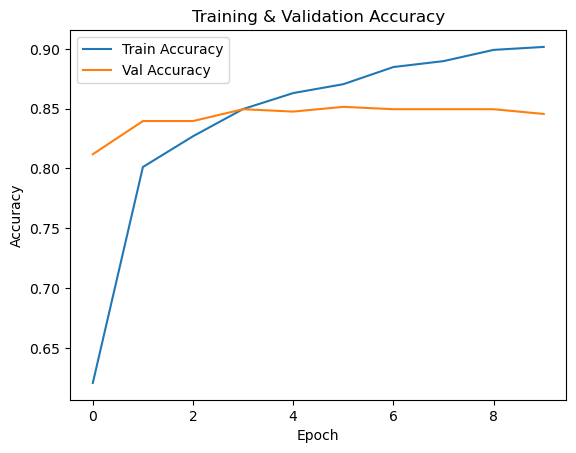

In [19]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
import os

# Create folder if it doesn't exist
os.makedirs("C:/Users/Mr/Garbage_Classification_Project/outputs", exist_ok=True)
plt.savefig("C:/Users/Mr/Garbage_Classification_Project/outputs/training_accuracy_plot.png")
plt.savefig('outputs/training_accuracy_plot.png')
plt.show()

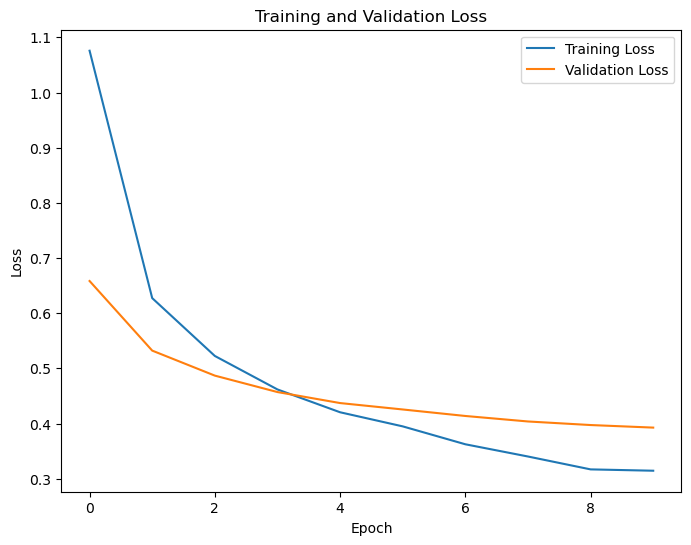

In [20]:
# Plot and save training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Create the outputs directory if it doesn't exist
os.makedirs("C:/Users/Mr/Garbage_Classification_Project/outputs", exist_ok=True)

# Save the loss plot
plt.savefig("C:/Users/Mr/Garbage_Classification_Project/outputs/training_loss_plot.png")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 652ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 624ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 587ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 676ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 612ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 529ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 613ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 628ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 561ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 565ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step
Classification Report:

              precision    recall  f1-score   support

   cardboard       0.90      0.90      0.90        83
       glass       0.86      0.84      0.85       103
       metal       0.84      0.85      0.84        78
       paper       0.85      0.89      0.87       124
     plastic       0.86      0.78      0.82        88
       trash       0.62      0

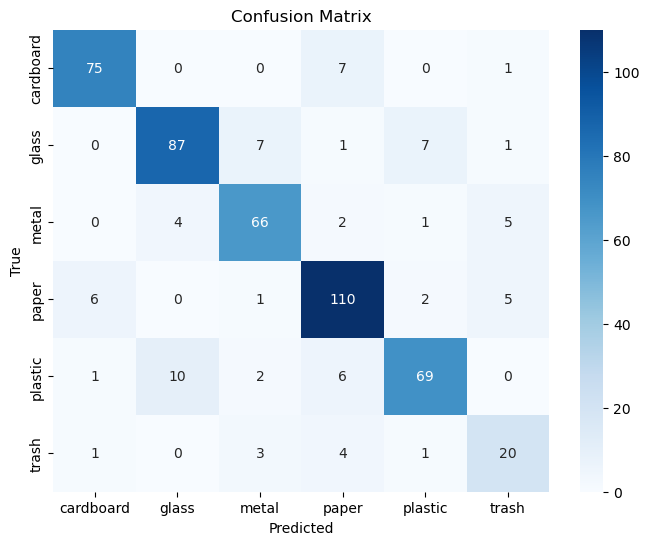

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Get true labels and predictions
y_true = []
y_pred = []

for images, labels in val_ds:
    preds = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

# Get class names
class_names = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

# Classification Report
print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.savefig("C:/Users/Mr/Garbage_Classification_Project/outputs/confusion_matrix.png")
plt.show()


In [22]:
val_loss, val_acc = model.evaluate(val_ds)
print(f"\nFinal Validation Accuracy: {val_acc:.2f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 16s 452ms/step - accuracy: 0.8490 - loss: 0.3891

Final Validation Accuracy: 0.85


In [23]:
model.save("C:/Users/Mr/Garbage_Classification_Project/best_garbage_classifier_model.keras")
print("Final model saved as 'best_garbage_classifier_model.keras'")

Final model saved as 'best_garbage_classifier_model.keras'


In [25]:
pip install gradio

Note: you may need to restart the kernel to use updated packages.


In [26]:
import gradio as gr
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import tensorflow as tf

# Load your trained model
model = load_model("best_garbage_classifier_model.keras")

# Define class names in the same order as during training
class_names = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

# Define the image preprocessing function
def preprocess_image(img):
    img = img.resize((128, 128))  # Resize to model input size
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0) / 255.0  # Normalize
    return img

# Define the prediction function
def classify_garbage(input_img):
    processed_img = preprocess_image(input_img)
    prediction = model.predict(processed_img)
    class_index = np.argmax(prediction)
    class_label = class_names[class_index]
    confidence = round(float(np.max(prediction)) * 100, 2)
    return f"{class_label} ({confidence}%)"

# Gradio interface
interface = gr.Interface(
    fn=classify_garbage,
    inputs=gr.Image(type="pil"),
    outputs="text",
    title="Garbage Classification using EfficientNetV2B2",
    description="Upload a garbage image and the model will predict its category."
)

# Launch app
interface.launch()


* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.


In [27]:
import gradio as gr
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import tensorflow as tf

# Load your trained model
model = load_model("best_garbage_classifier_model.keras")

# Define class names in the same order as during training
class_names = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

# Define the image preprocessing function
def preprocess_image(img):
    img = img.resize((128, 128))  # Resize to model input size
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0) / 255.0  # Normalize
    return img

# Define the prediction function
def classify_garbage(input_img):
    processed_img = preprocess_image(input_img)
    prediction = model.predict(processed_img)
    class_index = np.argmax(prediction)
    class_label = class_names[class_index]
    confidence = round(float(np.max(prediction)) * 100, 2)
    return f"{class_label} ({confidence}%)"

# Gradio interface
interface = gr.Interface(
    fn=classify_garbage,
    inputs=gr.Image(type="pil"),
    outputs="text",
    title="Garbage Classification using EfficientNetV2B2",
    description="Upload a garbage image and the model will predict its category."
)

# Launch app
interface.launch(share=True)


* Running on local URL:  http://127.0.0.1:7861
* Running on public URL: https://42af57d75d07c6fe16.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
